In [187]:
#1

for i in range(1,5):
    for j in range(1, 5-i+1):
        print('', end=' ')
    for j in range(2*i-1):
        print('*', end='')
    for j in range(1, 5-i):
        print('', end=' ')
    for j in range(1, 5-i+1):
        print('', end=' ')
    for j in range(2*i-1):
        print('*', end='')
    print()


    *       *
   ***     ***
  *****   *****
 ******* *******


In [185]:
#2
import random

def create_mine(n):
    mn = [[random.choice(['.','.','.','.','*']) for x in range(n)] for y in range(n)]
    return mn

mn = create_mine(6)
mn


[['.', '.', '.', '*', '.', '.'],
 ['*', '.', '*', '.', '*', '.'],
 ['.', '*', '.', '.', '.', '.'],
 ['.', '*', '.', '.', '.', '.'],
 ['.', '.', '.', '*', '.', '.'],
 ['*', '.', '.', '*', '.', '.']]

In [186]:
length = len(create_mine(6))
for i in range(length) :
    for j in range(length) :
        if mn[i][j]=='.':
            count = 0
            for x in range(i - 1, i + 2):      
                for y in range(j - 1, j + 2):
                    if x < 0 or y < 0 or x >=length  or y >= length:
                        continue
                    elif mn[x][y] == "*":
                        count += 1
            print(count, sep='', end='')
        elif mn[i][j]=='*':
            count =0
            print(mn[i][j], sep='', end='')
        print(end=' ')
    print()

1 2 2 * 2 1 
* 3 * 3 * 1 
3 * 3 2 1 1 
2 * 3 1 1 0 
2 2 3 * 2 0 
* 1 2 * 2 0 


In [170]:
#3
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from math import pi
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family = 'Malgun Gothic')

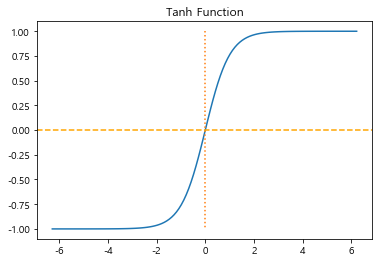

In [171]:
x = np.arange(-2.0*pi, 2.0*pi, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

In [172]:
#4
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib.request
import pandas as pd
from urllib.parse import urljoin

In [173]:
hdr = { 'User-Agent' : 'Mozilla/5.0' }
url = 'https://www.melon.com/chart/month/index.htm#params%5Bidx%5D=1&params%5BrankMonth%5D=202005&params%5BisFirstDate%5D=false&params%5BisLastDate%5D=true'
req = urllib.request.Request(url, headers=hdr)
html = urlopen(req).read()
soup = BeautifulSoup(html, 'html.parser')

In [174]:
lis = soup.find_all(class_='lst50')

In [175]:
song = soup.find(class_='ellipsis rank01')
singer = soup.find(class_='ellipsis rank02').find_all('a')
album = soup.find(class_='ellipsis rank03').find_all('a')
song.find('a').get_text()

'에잇(Prod.&Feat. SUGA of BTS)'

In [176]:
songs = []
singers = []
albums = []
ranks = []
last_ranks = []


for li in lis[:10]:
    songs.append(li.find(class_='ellipsis rank01').find('a').get_text())
    singers.append(li.find(class_='ellipsis rank02').find('a').get_text())
    albums.append(li.find(class_='ellipsis rank03').find('a').get_text())
    tmp_rank = li.find(class_='rank_wrap').find_all('span')[1].string
    if tmp_rank =='단계 상승':
        add = int(li.find(class_='up').string)
        rank = int(li.find(class_='rank').string)
        last_ranks.append(rank+add)
    elif tmp_rank =='단계 하락':
        add = int(li.find(class_='down').string)
        rank = int(li.find(class_='rank').string)
        last_ranks.append(rank-add)
    elif tmp_rank =='순위 동일':
        rank = int(li.find(class_='rank').string)
        last_ranks.append(rank)
    else:
        last_ranks.append('New')
    ranks.append(li.find(class_='rank').string)

In [177]:
import pandas as pd
df = pd.DataFrame({'순위':ranks,'제목':songs,'가수':singers,'앨범':albums,'전월순위':last_ranks})
df1 = df.set_index('순위')
df1

,제목,가수,앨범,전월순위
순위,,,,
1,에잇(Prod.&Feat. SUGA of BTS),아이유,에잇,New
2,아로하,조정석,슬기로운 의사생활 OST Part 3,2
3,살짝 설렜어 (Nonstop),오마이걸,NONSTOP,New
4,나비와 고양이 (feat.백현 (BAEKHYUN)),볼빨간사춘기,사춘기집Ⅱ 꽃 본 나비,New
5,시작,가호 (Gaho),이태원 클라쓰 OST Part.2,3
6,처음처럼,엠씨더맥스 (M.C the MAX),CEREMONIA,1
7,덤더럼(Dumhdurum),Apink (에이핑크),LOOK,11
8,좋은 사람 있으면 소개시켜줘,조이 (JOY),슬기로운 의사생활 OST Part 2,16
9,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,장범준,멜로가 체질 OST Part 3,4
